# Load libraries

In [19]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from keras import *

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [21]:
train_image_files_path = "/keras2production/fruits/Training/"
test_image_files_path = "/keras2production/fruits/Test/"

# Keras

https://keras.io/

In [22]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", "Limes", 
              "Mandarine", "Orange", "Peach", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Strawberry"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
batch_size = 32

In [23]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255,
    validation_split=0.25
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset='training',
    seed = 42)

valid_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset='validation',
    seed = 42)

Found 5788 images belonging to 16 classes.
Found 1921 images belonging to 16 classes.


In [24]:
epochs = 5
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

5788 1921


In [25]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('sigmoid'))

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20, 20, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 16)        0         
__________

In [27]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [28]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/5
180/180 [==============================] - 8s 45ms/step - loss: 1.5497 - acc: 0.5049 - val_loss: 0.4654 - val_acc: 0.9370
Epoch 2/5
180/180 [==============================] - 9s 49ms/step - loss: 0.5294 - acc: 0.8325 - val_loss: 0.1903 - val_acc: 0.9518
Epoch 3/5
180/180 [==============================] - 10s 55ms/step - loss: 0.2354 - acc: 0.9306 - val_loss: 0.0911 - val_acc: 0.9756
Epoch 4/5
180/180 [==============================] - 8s 43ms/step - loss: 0.1074 - acc: 0.9706 - val_loss: 0.0383 - val_acc: 0.9846
Epoch 5/5
180/180 [==============================] - 8s 46ms/step - loss: 0.0571 - acc: 0.9857 - val_loss: 0.0358 - val_acc: 0.9809


In [29]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


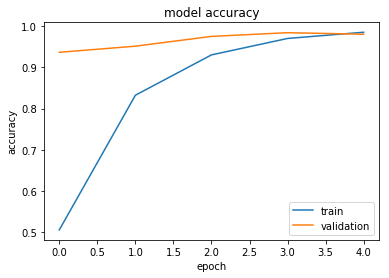

In [30]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

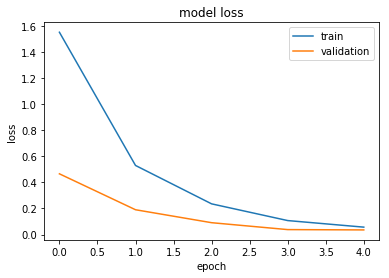

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

### Predict test data

In [32]:
test_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

test_image_array_gen = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 2428 images belonging to 16 classes.


In [33]:
model.evaluate_generator(test_image_array_gen,
                        steps = int(test_image_array_gen.n / batch_size))

[0.027933044709886112, 0.995]

In [34]:
classes = train_image_array_gen.class_indices
classes

{'Apricot': 0,
 'Avocado': 1,
 'Banana': 2,
 'Clementine': 3,
 'Cocos': 4,
 'Kiwi': 5,
 'Lemon': 6,
 'Limes': 7,
 'Mandarine': 8,
 'Orange': 9,
 'Peach': 10,
 'Pineapple': 11,
 'Plum': 12,
 'Pomegranate': 13,
 'Raspberry': 14,
 'Strawberry': 15}

In [35]:
probabilities = model.predict_generator(test_image_array_gen,
                        steps = int(test_image_array_gen.n / batch_size))

In [45]:
image_ids = pd.DataFrame(test_image_array_gen.filenames)
image_ids.columns = ['image_id']
image_ids.head()

,image_id
0,Apricot/321_100.jpg
1,Apricot/322_100.jpg
2,Apricot/323_100.jpg
3,Apricot/324_100.jpg
4,Apricot/325_100.jpg


In [47]:
prob_df = pd.DataFrame(probabilities, columns = classes)
prob_df = pd.concat([image_ids, prob_df], axis=1)
prob_df.head()

,image_id,Apricot,Avocado,Banana,Clementine,Cocos,Kiwi,Lemon,Limes,Mandarine,Orange,Peach,Pineapple,Plum,Pomegranate,Raspberry,Strawberry
0,Apricot/321_100.jpg,2.891163e-07,7.828735e-01,1.324726e-09,4.194286e-12,4.546065e-05,8.649706e-07,2.159456e-10,2.126682e-06,1.449996e-08,1.609334e-08,8.239132e-10,2.394107e-04,2.143163e-06,3.452250e-09,7.497663e-11,5.866352e-09
1,Apricot/322_100.jpg,5.013358e-12,3.117533e-13,1.486058e-06,5.139486e-08,5.191521e-07,3.537280e-13,6.175134e-10,1.280702e-11,1.642790e-09,3.334895e-11,9.131462e-10,7.383164e-07,6.351865e-09,5.050511e-07,9.964032e-01,1.234834e-05
2,Apricot/323_100.jpg,2.446403e-08,1.728633e-08,2.992426e-04,5.976832e-09,4.062885e-08,1.527777e-06,4.181082e-02,2.730347e-06,3.420351e-06,5.916525e-09,3.254282e-07,5.754392e-07,1.379541e-11,1.052784e-10,1.107324e-10,8.524584e-07
3,Apricot/324_100.jpg,3.121790e-08,1.000470e-04,2.361714e-06,7.216283e-10,1.212582e-02,2.367835e-06,6.520889e-09,6.644991e-08,6.719590e-08,5.544346e-10,4.658583e-08,2.021774e-04,9.324019e-07,1.221386e-07,4.524889e-06,3.068414e-05
4,Apricot/325_100.jpg,4.043156e-12,5.083320e-12,9.470075e-07,5.152776e-08,2.005681e-06,1.351382e-13,1.987563e-10,2.283459e-11,3.226689e-09,1.300029e-11,1.531197e-08,1.773747e-05,2.562767e-07,1.734493e-06,9.915565e-01,8.550190e-07


In [114]:
def plot_prediction(row):
    
    image = test_image_files_path + prob_df.iloc[row,0]
    print(image)
    
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])

    line_drop = prob_df.drop(columns=['image_id'])
    
    plt.subplot(1, 2, 2)
    plt.plot(line_drop.iloc[row,:])
    plt.xticks(rotation='vertical')
    
    plt.tight_layout()
    plt.show()

/keras2production/fruits/Test/Apricot/321_100.jpg


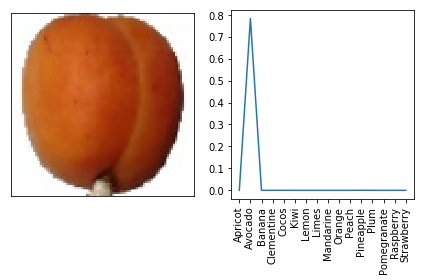

In [115]:
plot_prediction(0)

row 1863
/keras2production/fruits/Test/Plum/r_36_100.jpg


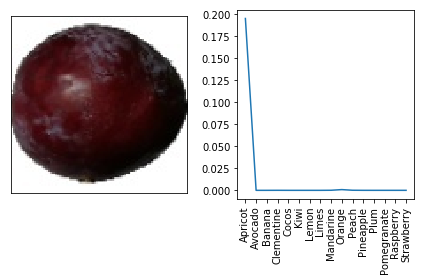

row 2063
/keras2production/fruits/Test/Pomegranate/r_288_100.jpg


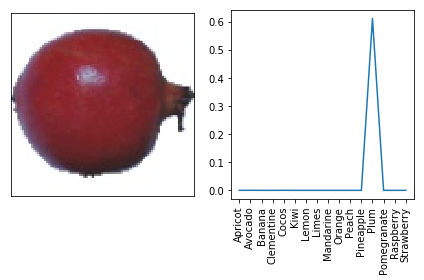

row 2055
/keras2production/fruits/Test/Pomegranate/r_280_100.jpg


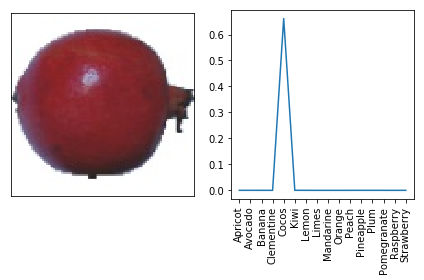

row 1613
/keras2production/fruits/Test/Orange/r_97_100.jpg


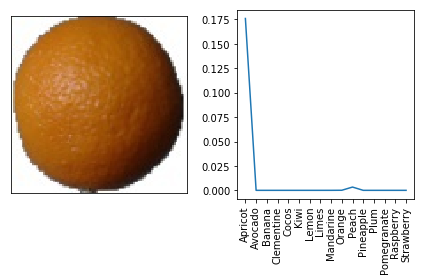

row 1469
/keras2production/fruits/Test/Orange/40_100.jpg


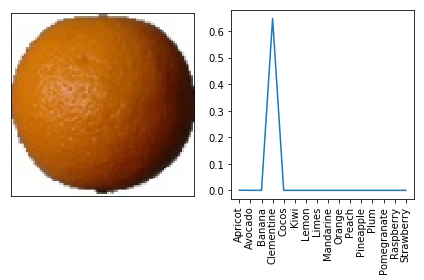

row 1234
/keras2production/fruits/Test/Limes/r_209_100.jpg


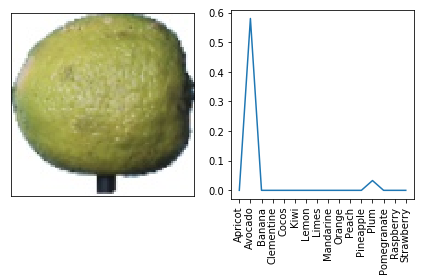

row 1928
/keras2production/fruits/Test/Plum/r_95_100.jpg


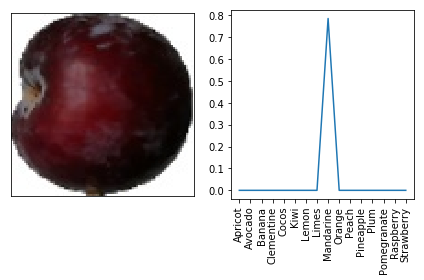

row 557
/keras2production/fruits/Test/Clementine/r_183_100.jpg


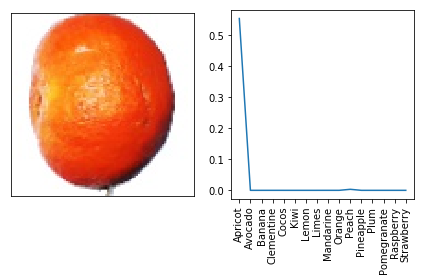

row 1734
/keras2production/fruits/Test/Pineapple/r_204_100.jpg


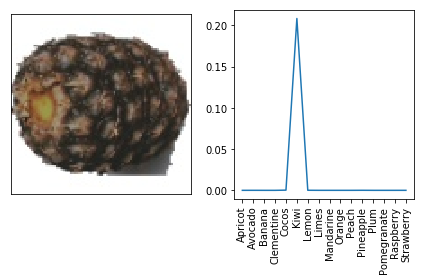

row 1370
/keras2production/fruits/Test/Mandarine/264_100.jpg


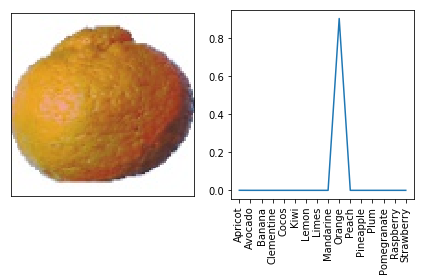

In [116]:
array = np.random.randint(0, len(prob_df), size=(10))

for i in array:
    print('row ' + str(i))
    plot_prediction(i)